Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billion pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used, and where the beans were grown.

Cadbury Ratings:
Rating Scale

4.0 - 5.0 = Outstanding
3.5 - 3.9 = Highly Recommended
3.0 - 3.49 = Recommended
2.0 - 2.9 = Disappointing
1.0 - 1.9 = Unpleasant

*Not all the bars in each range are considered equal, so to show variance from bars in the same range I have assigned .25, .50 or .75.

Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages, and review dates are included in the database when known. I would recommend people to try all the chocolate on the database regardless of the rating and experience for themselves.

The database is narrowly focused on plain dark chocolate to appreciate the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.

The flavor is the most important component of the Flavors of Cacao ratings. Diversity, balance, intensity, and purity of flavors are all considered. A straight forward single note chocolate can rate as high as a complex flavor profile that changes throughout. Genetics, terroir, post-harvest techniques, processing, and storage can all be discussed when considering the flavor component.

Texture has a great impact on the overall experience and it is also possible for texture related issues to impact flavor. It is a good way to evaluate the makers' vision, attention to detail, and level of proficiency.

Aftermelt is the experience after the chocolate has melted. Higher quality chocolate will linger and be long-lasting and enjoyable. Since the after melt is the last impression you get from the chocolate, it receives equal importance in the overall rating.

Overall Opinion is really where the ratings reflect a subjective opinion. Ideally, it is my evaluation of whether or not the components above worked together and opinion on the flavor development, character, and style. It is also here where each chocolate can usually be summarized by the most prominent impressions that you would remember about each chocolate

Acknowledgements
These ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society. For up-to-date information, as well as additional content (including interviews with craft chocolate makers), please see his website: Flavors of Cacao

To find:

Where are the best cocoa beans grown?
Who creates the best Chocolate bars?
What is Favorite taste?
Which company has highest Rate?
How to increase the demand for this company?

## Variable Descriptions

Variable                         Description
Index
ref                               Unique number of the company
company                           Comapny Name
company_location                  company location
review_date                       date of review of chocolate bar
country_of_bean_origin            country of chocolate bean
specific_bean_origin_or_bar_name  province of chocolate bean
cocoa_percent                     percentage of chocolate bar
rating                            chocolate bar rating
counts_of_ingredients             number of ingredients
beans                             have bean or not
cocoa_butter                      have cocoa butter or not
vanilla                           have vanilla or not
lecithin                          have lecithin or not
salt                              have salt or not
sugar                             have sugar or not
sweetener_without_sugar           have sweetener or not
first_taste                       taste number one
second_taste                      taste number two
third_taste                       taste number three
fourth_taste                      taste number four

#### Importing essential libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Default theme
#plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = [4,4]

#### Data analysis

In [4]:
train = pd.read_csv('C:\\Users\\priya\\Desktop\\intro to datascience\\Datasets\\Chocolate\\chocolate data.csv')
train.head()

,Index,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,1,2486,Maverick,U.S.A,2020,Vietnam,"Dak Nong, Marou Cacao",75.0,3.00,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,roasty,hammy,dirty,NaN
1,2,2486,Nuance,U.S.A,2020,Vietnam,"Lam Dong, 2016 h., batch 20111",70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,spicy,cocoa,hammy,NaN
2,3,2486,Nuance,U.S.A,2020,Nigeria,"Akwa Ibom, 2017 h., batch 19762",70.0,3.00,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,nut,dried fruit,rubbery
3,4,2482,Maverick,U.S.A,2020,Madagascar,"Akesson P., Sambirano",65.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet edge,sour fruit,NaN,NaN
4,5,2482,Maverick,U.S.A,2020,U.s.a.,"Hawai'i Island, Big Island, Mauna Kea",70.0,3.00,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nutty,cheese,savory,NaN


In [5]:
train.shape 

(948, 21)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Index                             948 non-null    int64  
 1   ref                               948 non-null    int64  
 2   company                           948 non-null    object 
 3   company_location                  948 non-null    object 
 4   review_date                       948 non-null    int64  
 5   country_of_bean_origin            948 non-null    object 
 6   specific_bean_origin_or_bar_name  948 non-null    object 
 7   cocoa_percent                     948 non-null    float64
 8   rating                            948 non-null    float64
 9   counts_of_ingredients             948 non-null    int64  
 10  beans                             948 non-null    object 
 11  cocoa_butter                      948 non-null    object 
 12  vanilla 

In [7]:
# As we see above we have 948 rows and 21 columns

Text(0.5, 1.0, 'Type of our data')

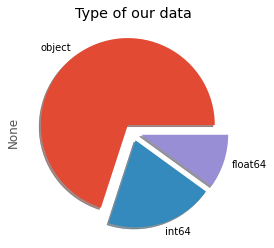

In [224]:
train.dtypes.value_counts().plot.pie(explode = [0.1,0.1,0.1], shadow = True)
plt.title('Type of our data')

In [36]:
train.beans.value_counts().have_bean # as all of the 948 rows are having bean in Beans column,/
                                     # there is no pint in including it in our analysis

948

In [8]:
# Show the categorical columns
cat_columns = [f for f in train.columns if train.dtypes[f] == object]
cat_columns.remove('company')
cat_columns.remove('company_location')
cat_columns.remove('country_of_bean_origin')
cat_columns.remove('beans')
cat_columns.remove('specific_bean_origin_or_bar_name')
cat_columns

['cocoa_butter',
 'vanilla',
 'lecithin',
 'salt',
 'sugar',
 'sweetener_without_sugar',
 'first_taste',
 'second_taste',
 'third_taste',
 'fourth_taste']

In [9]:
# Show the Numerical columns
num_columns = [f for f in train.columns if train.dtypes[f] != object]
num_columns.remove('Index')
num_columns.remove('ref')
num_columns.remove('review_date')
num_columns.remove('rating')
num_columns

['cocoa_percent', 'counts_of_ingredients']

In [10]:
train.describe(include='all')

,Index,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
count,948.000000,948.000000,948,948,948.000000,948,948,948.000000,948.000000,948.000000,...,948,948,948,948,948,948,948,918,691,102
unique,NaN,NaN,211,1,NaN,39,632,NaN,NaN,NaN,...,2,2,2,2,2,2,267,292,199,51
top,NaN,NaN,Arete,U.S.A,NaN,Dominican republic,Dominican Republic,NaN,NaN,NaN,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,sweet,cocoa,roasty
freq,NaN,NaN,32,948,NaN,134,25,NaN,NaN,NaN,...,553,785,842,939,913,913,50,51,31,8
mean,474.500000,1378.871308,NaN,NaN,2014.113924,NaN,NaN,71.536392,3.175897,2.876582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,273.808327,636.010560,NaN,NaN,3.234531,NaN,NaN,4.739964,0.431846,0.917137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.000000,NaN,NaN,2006.000000,NaN,NaN,55.000000,1.500000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,237.750000,903.000000,NaN,NaN,2012.000000,NaN,NaN,70.000000,3.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,474.500000,1428.000000,NaN,NaN,2014.000000,NaN,NaN,70.000000,3.250000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,711.250000,1901.000000,NaN,NaN,2016.000000,NaN,NaN,74.000000,3.500000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Basic observation is that:
# Arete is the most popular chocolate company.
# The bean origin of Dominican republic is well known.
# flavors of cocoa_butter, no vanilla,no lecithin, no salt and with sugar is preferred
# People also prefer first taste to be creamy and then sweet, followed by cocoa and finally roasty!

# We will cover each of these in depth later

In [12]:
# Finding the missing values:

missingvalues = train.isnull().sum()
missingvalues

Index                                 0
ref                                   0
company                               0
company_location                      0
review_date                           0
country_of_bean_origin                0
specific_bean_origin_or_bar_name      0
cocoa_percent                         0
rating                                0
counts_of_ingredients                 0
beans                                 0
cocoa_butter                          0
vanilla                               0
lecithin                              0
salt                                  0
sugar                                 0
sweetener_without_sugar               0
first_taste                           0
second_taste                         30
third_taste                         257
fourth_taste                        846
dtype: int64

In [13]:
# We notice that other than the second,third and fourth taste,no other data is missing; which is good news!
# fourth_taste is missing nearly 90% of the data as seen, so we are going to drop this column.

In [14]:
# second_taste
train.second_taste.value_counts()

sweet          51
earthy         32
nutty          29
cocoa          26
roasty         24
               ..
leafy           1
sour ending     1
mild orange     1
mushroom        1
raw             1
Name: second_taste, Length: 292, dtype: int64

In [15]:
train.second_taste.describe()

count       918
unique      292
top       sweet
freq         51
Name: second_taste, dtype: object

In [16]:
# Replace null values using top value of describe
train['second_taste'].fillna('sweet', inplace = True)
train.second_taste.isnull().sum() #checking

0

In [17]:
#Repeat the same for third_taste as almost 28% of the data is missing:
train.third_taste.describe()

count       691
unique      199
top       cocoa
freq         31
Name: third_taste, dtype: object

In [18]:
train['third_taste'].fillna('cocoa', inplace = True)
train.third_taste.isnull().sum() #checking

0

In [19]:
# Drop the fourth_taste:
train = train.drop('fourth_taste', axis= 1)

In [20]:
train.isnull().sum()

Index                               0
ref                                 0
company                             0
company_location                    0
review_date                         0
country_of_bean_origin              0
specific_bean_origin_or_bar_name    0
cocoa_percent                       0
rating                              0
counts_of_ingredients               0
beans                               0
cocoa_butter                        0
vanilla                             0
lecithin                            0
salt                                0
sugar                               0
sweetener_without_sugar             0
first_taste                         0
second_taste                        0
third_taste                         0
dtype: int64

#### Data Visualization

In [21]:
cat_columns

['cocoa_butter',
 'vanilla',
 'lecithin',
 'salt',
 'sugar',
 'sweetener_without_sugar',
 'first_taste',
 'second_taste',
 'third_taste',
 'fourth_taste']

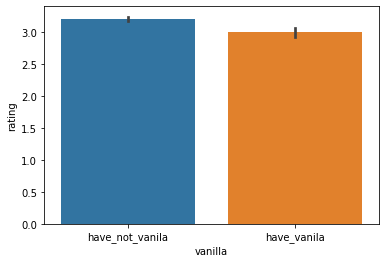

In [22]:
sns.barplot( x = 'vanilla', y = 'rating', data =train)

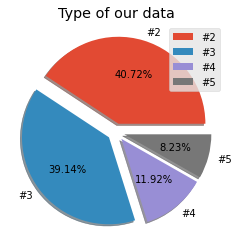

In [98]:
size = train.counts_of_ingredients.value_counts()
explode = [0.1,0.1, 0.1,0.1]

plt.pie(size, explode = explode , labels = labels, autopct = '%.2f%%', shadow = True)
plt.title('Type of our data')
plt.legend(loc = 0)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Salt in the chocolate')

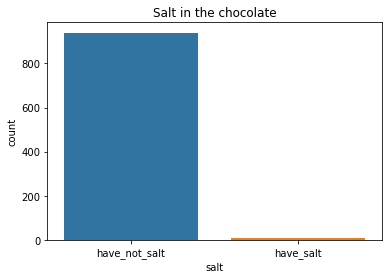

In [23]:
sns.countplot( x = train.salt)
plt.title( 'Salt in the chocolate')

Text(0.5, 1.0, 'cocoa_butter in the chocolate')

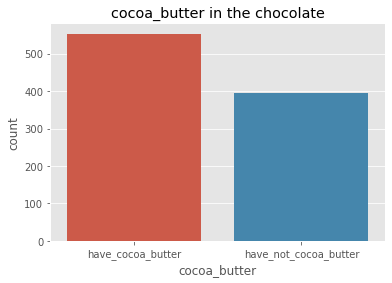

In [226]:
sns.countplot( x = train.cocoa_butter)
plt.title( 'cocoa_butter in the chocolate')

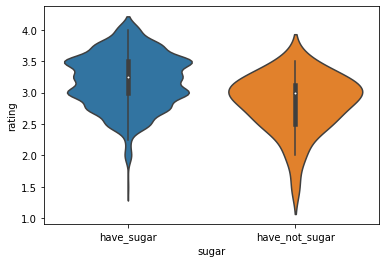

In [24]:
sns.violinplot( x = 'sugar', y = 'rating', data =train  ,split =True)

In [25]:
#defining function percentageconvert rowise in crosstable
def percentageconvert(ser):
    return (ser/ser[-1])*100

#highest ratings is for count of ingredients 2 and 3:
df1 = pd.crosstab(train.first_taste, train.rating, margins =True).apply(percentageconvert,axis = 1)
df2 = pd.crosstab(train.second_taste, train.rating, margins =True).apply(percentageconvert,axis = 1)

In [26]:
first = df1[df1[4.0] == 100.000000]
first

rating,1.5,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,All
first_taste,,,,,,,,,,,
blackberry and cinnamon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
chocolate covered banana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
fig,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
marshmallow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
mild tart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
simple red berry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
smoth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
strong spice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
well defined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0


In [27]:
df2[df2[4.0] == 100.00000]

rating,1.5,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,All
second_taste,,,,,,,,,,,
delicate cocoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
dense,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
distinquished,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
intense pepper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
pear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
roasted cocoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
rounded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0
yogurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0


#### Data Selection

In [28]:
train

,Index,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste
0,1,2486,Maverick,U.S.A,2020,Vietnam,"Dak Nong, Marou Cacao",75.0,3.00,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,roasty,hammy,dirty
1,2,2486,Nuance,U.S.A,2020,Vietnam,"Lam Dong, 2016 h., batch 20111",70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,spicy,cocoa,hammy
2,3,2486,Nuance,U.S.A,2020,Nigeria,"Akwa Ibom, 2017 h., batch 19762",70.0,3.00,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,nut,dried fruit
3,4,2482,Maverick,U.S.A,2020,Madagascar,"Akesson P., Sambirano",65.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet edge,sour fruit,cocoa
4,5,2482,Maverick,U.S.A,2020,U.s.a.,"Hawai'i Island, Big Island, Mauna Kea",70.0,3.00,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nutty,cheese,savory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,944,24,Original Hawaiin Chocolate Factory,U.S.A,2006,U.s.a.,"Hawai'i Island, Kona Estate, Hualalai Mtn",60.0,3.00,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muddy,pastey,sweet
944,945,15,Guittard,U.S.A,2006,Colombia,Chucuri,65.0,3.00,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,sweet,floral
945,946,15,Scharffen Berger,U.S.A,2006,Blend,Bittersweet,70.0,3.50,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cherry,mild bitter,cocoa
946,947,15,Scharffen Berger,U.S.A,2006,Blend,Extra Dark,82.0,2.00,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,dry,bitter,poor aftertaste


In [29]:
# First we will drop the columns Index, ref, company, company_location, country of bean origin,specific_bean_origin_or_bar_name and beans
train.columns
df_train = train.drop(['Index', 'ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name','beans'], axis =1)

In [30]:
df_train

,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste
0,75.0,3.00,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,roasty,hammy,dirty
1,70.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,spicy,cocoa,hammy
2,70.0,3.00,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,nut,dried fruit
3,65.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet edge,sour fruit,cocoa
4,70.0,3.00,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nutty,cheese,savory
...,...,...,...,...,...,...,...,...,...,...,...,...
943,60.0,3.00,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muddy,pastey,sweet
944,65.0,3.00,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,sweet,floral
945,70.0,3.50,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cherry,mild bitter,cocoa
946,82.0,2.00,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,dry,bitter,poor aftertaste


#### Label Encoding

In [31]:
cat_columns

['cocoa_butter',
 'vanilla',
 'lecithin',
 'salt',
 'sugar',
 'sweetener_without_sugar',
 'first_taste',
 'second_taste',
 'third_taste',
 'fourth_taste']

In [32]:
cocoa_butter_dum = pd.get_dummies(df_train['cocoa_butter'])
vanilla_dum = pd.get_dummies(df_train['vanilla'])
lecithin_dum = pd.get_dummies(df_train['lecithin'])
salt_dum = pd.get_dummies(df_train['salt'])
sugar_dum = df_salt = pd.get_dummies(df_train['sugar'])

In [33]:
final_data= pd.concat([df_train, cocoa_butter_dum, vanilla_dum, lecithin_dum, salt_dum, sugar_dum], axis=1)
final_data.shape
final_data = final_data.drop(['cocoa_butter', 'vanilla', 'lecithin','salt', 'sugar','sweetener_without_sugar'], axis = 1)
final_data

,cocoa_percent,rating,counts_of_ingredients,first_taste,second_taste,third_taste,have_cocoa_butter,have_not_cocoa_butter,have_not_vanila,have_vanila,have_lecithin,have_not_lecithin,have_not_salt,have_salt,have_not_sugar,have_sugar
0,75.0,3.00,3,roasty,hammy,dirty,1,0,1,0,0,1,1,0,0,1
1,70.0,3.25,3,spicy,cocoa,hammy,1,0,1,0,0,1,1,0,0,1
2,70.0,3.00,3,cocoa,nut,dried fruit,1,0,1,0,0,1,1,0,0,1
3,65.0,3.25,3,sweet edge,sour fruit,cocoa,1,0,1,0,0,1,1,0,0,1
4,70.0,3.00,3,nutty,cheese,savory,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,60.0,3.00,5,muddy,pastey,sweet,1,0,0,1,1,0,1,0,0,1
944,65.0,3.00,5,creamy,sweet,floral,1,0,0,1,1,0,1,0,0,1
945,70.0,3.50,5,cherry,mild bitter,cocoa,1,0,0,1,1,0,1,0,0,1
946,82.0,2.00,5,dry,bitter,poor aftertaste,1,0,0,1,1,0,1,0,0,1


In [192]:
final_data.dtypes

cocoa_percent            float64
rating                   float64
counts_of_ingredients      int64
first_taste               object
second_taste              object
third_taste               object
have_cocoa_butter          uint8
have_not_cocoa_butter      uint8
have_not_vanila            uint8
have_vanila                uint8
have_lecithin              uint8
have_not_lecithin          uint8
have_not_salt              uint8
have_salt                  uint8
have_not_sugar             uint8
have_sugar                 uint8
dtype: object

In [34]:
# To perform sklearn we should convert all the categorical variables into numeric by encoding the categories:
# This is done by using label encoder.

cat = ['first_taste','second_taste','third_taste']

for var in cat:
    le = preprocessing.LabelEncoder()
    final_data[var] = le.fit_transform(final_data[var].astype('str'))
    
final_data.dtypes
final_data.columns

Index(['cocoa_percent', 'rating', 'counts_of_ingredients', 'first_taste',
       'second_taste', 'third_taste', 'have_cocoa_butter',
       'have_not_cocoa_butter', 'have_not_vanila', 'have_vanila',
       'have_lecithin', 'have_not_lecithin', 'have_not_salt', 'have_salt',
       'have_not_sugar', 'have_sugar'],
      dtype='object')

#### Predicting the rating:
    

We will use one of the simplest machine learning models, i.e. the linear regression model, to predict the rating given by the customer. Linear regression represents a very simple method for supervised learning and it is an effective tool for predicting quantitative responses. This model, like most of the supervised machine learning algorithms, makes a prediction based on the input features. The predicted output values are used for comparisons with desired outputs  

#### Splitting the data

In [35]:
x = final_data.drop(['first_taste','second_taste', 'third_taste','rating'], axis =1 )
y = final_data.rating

In [36]:
print(x.shape)
print(y.shape)

(948, 12)
(948,)


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

#### Feature Scaling

In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Linear Regression

In [39]:
lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.intercept_)
print(lm.coef_)

3.188466947960619
[-0.01193669 -0.0139701   0.00421072 -0.00421072  0.04101853 -0.04101853
  0.00754995 -0.00754995  0.01970325 -0.01970325 -0.02168697  0.02168697]


In [40]:
cdf = pd.DataFrame(lm.coef_, x.columns, columns = ['Coeffecient'])
cdf

,Coeffecient
cocoa_percent,-0.011937
counts_of_ingredients,-0.013970
have_cocoa_butter,0.004211
have_not_cocoa_butter,-0.004211
have_not_vanila,0.041019
have_vanila,-0.041019
have_lecithin,0.007550
have_not_lecithin,-0.007550
have_not_salt,0.019703
have_salt,-0.019703


In [41]:
# Predicting the output:
predictions = lm.predict(x_test)
print( 'Predicted ratings given by the customers:', predictions)
predictions.shape

Predicted ratings given by the customers: [3.23456143 3.24331927 3.23813714 3.22518182 3.23295501 3.00334668
 3.03341657 3.22678824 3.23813714 3.21222649 3.23813714 3.22937931
 3.23974356 2.7737001  2.96015762 3.23456143 3.23974356 3.02823444
 3.22160611 2.99298242 3.21222649 3.22259075 3.25010782 3.23813714
 3.21999969 3.04637189 3.21222649 3.23974356 3.03341657 3.25109246
 3.22160611 3.05414509 3.22777288 3.02046125 3.21740862 3.20963543
 3.23813714 3.22678824 3.23974356 3.23813714 3.23813714 3.05673615
 3.23036395 3.23974356 3.22678824 2.99298242 3.24751676 3.23813714
 3.03341657 3.23974356 3.23813714 3.04637189 3.23974356 3.00063001
 3.27253012 3.22518182 3.00232379 3.23295501 3.00063001 2.98261816
 3.26565421 3.23813714 3.23295501 3.23813714 3.24331927 3.23295501
 3.23813714 3.23974356 3.25269889 3.23974356 3.23456143 3.21999969
 3.00063001 3.23974356 3.20087759 3.07228254 3.23813714 3.20704436
 3.22419718 3.23813714 3.23456143 3.26565421 3.22937931 3.21383292
 2.98767469 3.231970

(237,)

In [42]:
y_test.shape

(237,)

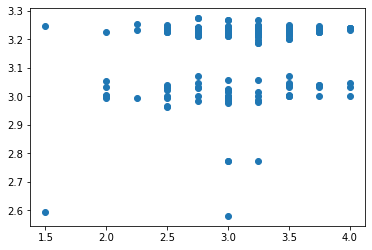

In [43]:
plt.scatter(y_test, predictions)

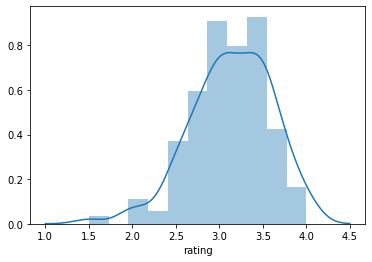

In [44]:
sns.distplot(y_test)

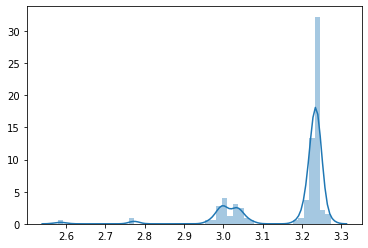

In [53]:
sns.distplot(predictions, bins = 50)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 0.3618350812962835
MSE: 0.20821534788667784
